In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob 
import seaborn as sns
from random import sample

In [5]:
# Create a function to randomly sample from dataframe
def calculate_sharpe_ratio(df: pd.DataFrame):
    return df['net_worth'].mean() / df['net_worth'].std()

def random_sample(df: pd.DataFrame, n: int):
    return df.sample(n=n)

# Create a function to simulate a sample of n random samples
def simulate_random_sample(df: pd.DataFrame, n: int, sample_size: int):
    results = []
    for i in range(n):
        results.append(calculate_sharpe_ratio(random_sample(df, sample_size)))
    return results

nn_data = pd.read_csv('../staging/ML/results_ml_neural_network.csv')
sharpe_ratio = simulate_random_sample(nn_data, 10000, 70)

/Users/georgemaksour/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


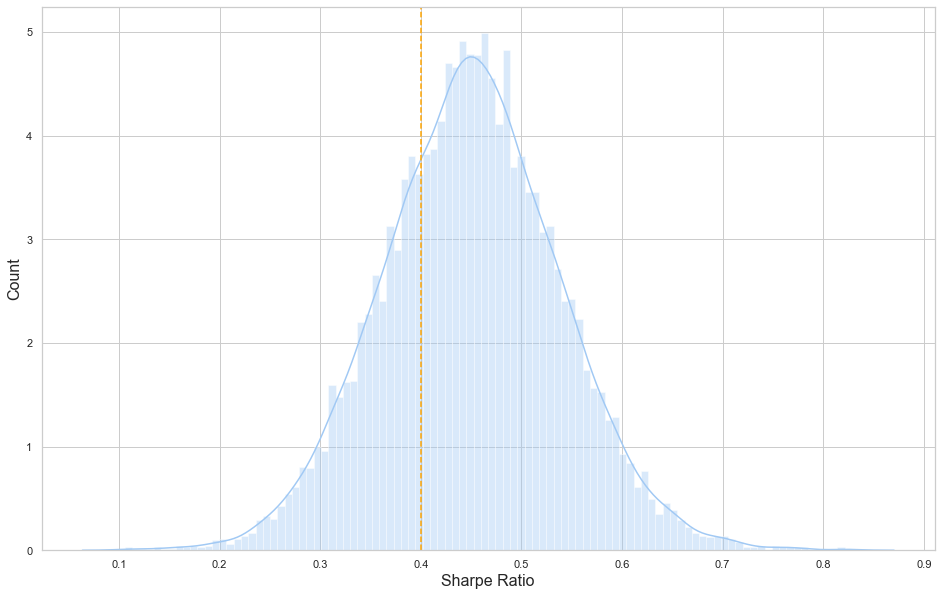

In [8]:
# plot seaborn density histogram of sharpe ratio
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette='pastel')

sns.distplot(sharpe_ratio, hist=True, kde=True, bins=100)

plt.xlabel('Sharpe Ratio', fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.axvline(x=0.4, color='orange', linestyle='--')


plt.savefig('../output/figures/rewards/sharpe_hist.png', dpi=300, bbox_inches='tight')

In [9]:
pd.DataFrame(nn_data)

,Unnamed: 0,number_of_wins,number_of_losses,no_of_trades,net_worth,number_of_holds,percent staked,model_name
0,0,1,0,1,0.259535,0,0.427469,neural_network
1,1,1,0,1,1.573473,0,0.419593,neural_network
2,2,0,1,1,-0.352909,0,0.190986,neural_network
3,3,1,0,1,0.295640,0,0.330422,neural_network
4,4,1,0,1,0.461411,0,0.425222,neural_network
...,...,...,...,...,...,...,...,...
767,767,0,1,1,-0.094834,0,0.412807,neural_network
768,768,0,0,0,0.000000,1,0.000000,neural_network
769,769,1,0,1,1.208482,0,0.331740,neural_network
770,770,1,0,1,0.093114,0,0.416274,neural_network


In [10]:
def get_win_loss_ratio(input_data, rang):
    ratio = []
    for i in range(0, rang):
        sample_data = input_data.sample(30)
        ratio.append(sample_data['number_of_wins'].sum()/sample_data['number_of_losses'].sum())
    return ratio


/Users/georgemaksour/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

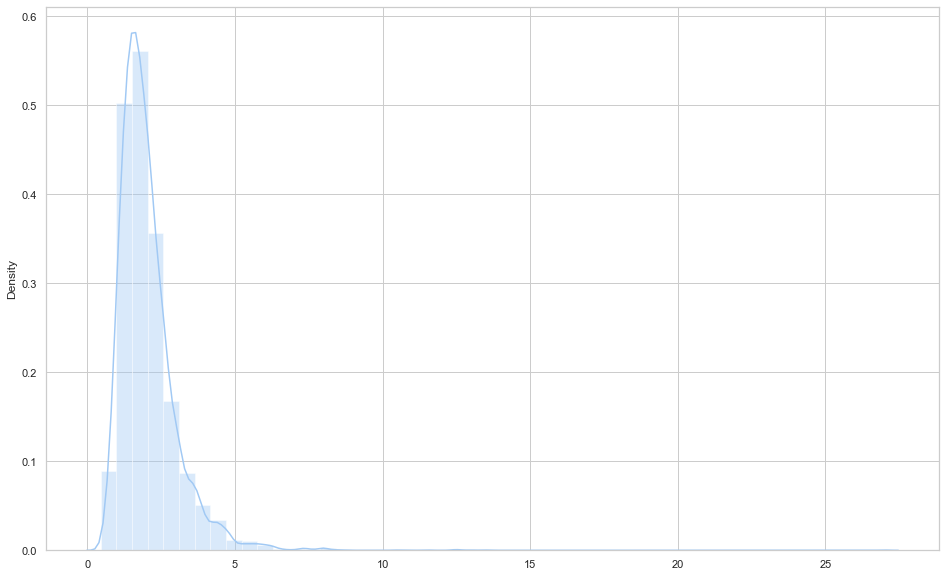

In [11]:
sns.distplot([v for v in get_win_loss_ratio(nn_data, 10000) if not np.isnan(v) and not np.isinf(v)], hist=True, kde=True)

In [25]:
data = pd.read_csv('../staging/ML/neural_network_predict_probas.csv')

In [26]:
data['predictions'] = data[['L', 'H', 'B']].idxmax(axis=1)

target = []
for index, row in data.iterrows():
    if row['192'] > row['240']:
        target.append(1)
    elif row['192'] < row['240']:
        target.append(-1)
    else:
        target.append(0)

data['target'] = target


In [27]:
mapping_dict = {'B': -1, 'H': 0, 'L': 1}
data['predictions'] = data['predictions'].replace(mapping_dict)

In [41]:
ppt = []
for index, row in data.iterrows():
    if row['predictions'] == -1:
        amount = (row['240']/row['192'])
        if amount > 0:
            calc = row['B']*10*0.82*amount
        else:
            calc = row['B']*10*amount
    ppt.append(calc)
    if row['predictions'] == 1:
        amount = (row['192']/row['240'])
        if amount > 0:
            calc = row['B']*10*0.85*amount
        else:
            calc = row['B']*10*amount
    ppt.append(calc)

In [42]:
np.mean(ppt)

4.658189974721008

In [43]:
def profit_per_trade(ppt, n):
    result = []
    for i in range(1,n):
        result.append(np.mean(sample(ppt, 30)))
    return result


4.658290534531019
0.3777611200246059


/Users/georgemaksour/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


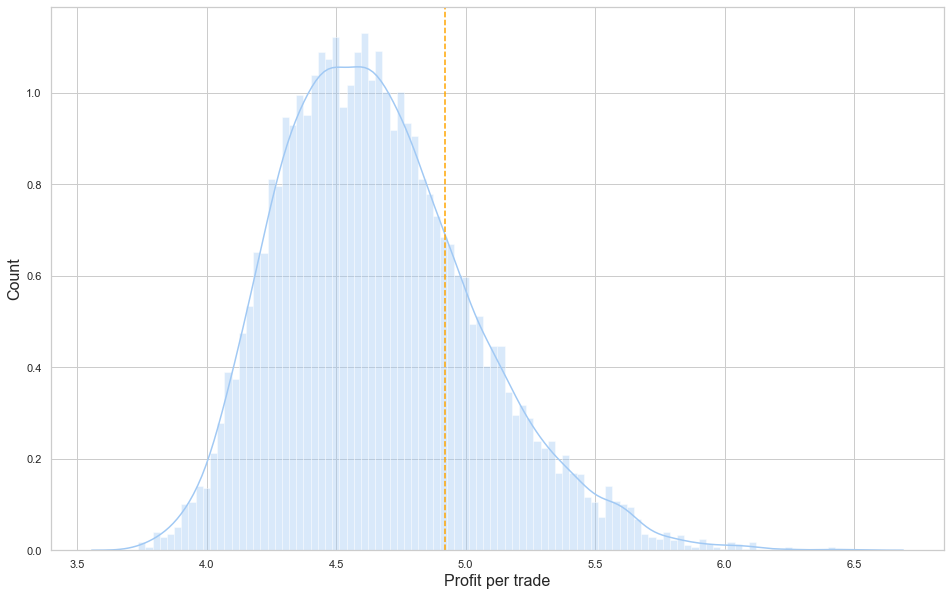

In [50]:
# plot seaborn density histogram of sharpe ratio

results = profit_per_trade(ppt, 10000)
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette='pastel')

print(np.mean(results))
print(np.std(results))
sns.distplot(results, hist=True, kde=True, bins=100)

plt.xlabel('Profit per trade', fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.axvline(x=04.92, color='orange', linestyle='--')

plt.savefig('../output/figures/profit_per_trade.png', dpi=300, bbox_inches='tight')